Analysis done working through tutorial at:


https://pv-tutorials.github.io/2024_PVSC/Tutorial%201%20-%20TMY%20Weather%20Data.html

In [282]:
import pvlib
import matplotlib.pyplot as plt
import pandas as pd

In [283]:
# Open weather data from an epw file
# Downloaded from https://re.jrc.ec.europa.eu/pvg_tools/en/
# See user manual at https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis/getting-started-pvgis/pvgis-user-manual_en
df_tmy, metadata = pvlib.iotools.read_epw('data/tmy_51.483_-1.714_2005_2023.epw')
metadata

{'loc': 'LOCATION',
 'city': 'unknown',
 'state-prov': '-',
 'country': 'unknown',
 'data_type': 'ECMWF/ERA',
 'WMO_code': 'unknown',
 'latitude': 51.483,
 'longitude': -1.714,
 'TZ': 0.0,
 'altitude': 166.0}

In [284]:
# the data contains a row for every hour of the year the index currently shows with true year the data was recorded
# this is because the TMY takes the [median?] of the data since 2005 to 2023
# to ease data visualisation I will overried the index year value to a dummy of 2024
df_tmy.index = df_tmy.index.map(lambda x: x.replace(year=2024))
df_tmy.index = df_tmy.index + pd.Timedelta(hours=1)

# df = df.loc['2024-05-10':'2024-05-20']
df_tmy.head()


,year,month,day,hour,minute,data_source_unct,temp_air,temp_dew,relative_humidity,atmospheric_pressure,...,ceiling_height,present_weather_observation,present_weather_codes,precipitable_water,aerosol_optical_depth,snow_depth,days_since_last_snowfall,albedo,liquid_precipitation_depth,liquid_precipitation_quantity
2024-01-01 01:00:00+00:00,2018,1,1,1,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.71,2.95,82.47,97670.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-01-01 02:00:00+00:00,2018,1,1,2,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.41,2.61,82.14,97700.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-01-01 03:00:00+00:00,2018,1,1,3,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,5.12,2.26,81.82,97730.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-01-01 04:00:00+00:00,2018,1,1,4,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,4.83,1.92,81.49,97710.0,...,99999,9,999999999,999,0.999,999,99,999,999,99
2024-01-01 05:00:00+00:00,2018,1,1,5,0,B8B8E8B8?1A1A1A1?0?0?0?0B8B8?0?0?0?0?0?0?0?0,4.53,1.58,81.17,97650.0,...,99999,9,999999999,999,0.999,999,99,999,999,99


In [285]:
display(df_tmy.keys())
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Index(['year', 'month', 'day', 'hour', 'minute', 'data_source_unct',
       'temp_air', 'temp_dew', 'relative_humidity', 'atmospheric_pressure',
       'etr', 'etrn', 'ghi_infrared', 'ghi', 'dni', 'dhi', 'global_hor_illum',
       'direct_normal_illum', 'diffuse_horizontal_illum', 'zenith_luminance',
       'wind_direction', 'wind_speed', 'total_sky_cover', 'opaque_sky_cover',
       'visibility', 'ceiling_height', 'present_weather_observation',
       'present_weather_codes', 'precipitable_water', 'aerosol_optical_depth',
       'snow_depth', 'days_since_last_snowfall', 'albedo',
       'liquid_precipitation_depth', 'liquid_precipitation_quantity'],
      dtype='object')

Number of rows: 228
Number of columns: 4


In [286]:
# ghi, dhi, dni are irradiance measurements, temp_air is the air temperature, and wind_speed is the wind speed.
df_tmy = df_tmy[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
df_tmy.columns = ['GHI', 'DHI', 'DNI', 'Temperature', 'Wind Speed']

In [ ]:
# The April data that PV-GIS provides comes from 2007 which is the sunniest April in recent history!
# I cannot explain why this is happening but it is clear this is not a 'typical' April.
# Instead I will import all the historical hourly data from 2005 to 2023
# determine the median month for total GHI and construct my own TMY.

# import csv from PV-GIS

# Define the file paths
input_file = 'data/Timeseries_51.483_-1.718_SA3_0deg_0deg_2005_2023.csv'
stripped_file = 'data/PV-GIS_timeseries_stripped.csv'

# Open the file and preprocess it
with open(input_file, 'r') as infile, open(stripped_file, 'w') as outfile:
    lines = infile.readlines()
    # Write only the rows that are valid CSV data (strip rows 1-8 and 166546 onward)
    for i, line in enumerate(lines):
        if i > 7 and i < 166545:  # Keep rows between 8 and 166545 (inclusive)
            outfile.write(line)

# Now read the stripped CSV file
df_csv = pd.read_csv(stripped_file, parse_dates=True, index_col=0)

# Display the first few rows of the processed DataFrame
# Clean the index to ensure it is in pandas datetime format
df_csv.index = pd.to_datetime(df_csv.index, format='%Y%m%d:%H%M')

# Process the DataFrame to include only the required columns with new names
df_historical = pd.DataFrame({
    'GHI': df_csv['Gb(i)'] + df_csv['Gd(i)'],
    'Temperature': df_csv['T2m'],
    'Wind Speed': df_csv['WS10m']
})

# Ideally would store the minute past the hour for good order.
df_historical.index = df_historical.index.floor('h') # truncate minutes data
df_historical.index = df_historical.index + pd.Timedelta(hours=1) # shift hour by +1 so data is End of Period.

print(type(df_historical.index))

# Display the first few rows of the processed DataFrame
print(df_historical.head(40))

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/3673132132.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_csv = pd.read_csv(stripped_file, parse_dates=True, index_col=0)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                        GHI  Temperature  Wind Speed
time                                                
2005-01-01 01:00:00    0.00         4.29        2.55
2005-01-01 02:00:00    0.00         3.98        2.62
2005-01-01 03:00:00    0.00         4.16        2.83
2005-01-01 04:00:00    0.00         4.51        3.03
2005-01-01 05:00:00    0.00         5.21        3.17
2005-01-01 06:00:00    0.00         5.94        3.31
2005-01-01 07:00:00    0.00         6.59        3.52
2005-01-01 08:00:00    0.00         6.73        3.79
2005-01-01 09:00:00    0.00         6.97        4.00
2005-01-01 10:00:00    6.00         7.10        4.14
2005-01-01 11:00:00   35.00         7.34        4.55
2005-01-01 12:00:00   90.00         7.86        5.03
2005-01-01 13:00:00  102.00         8.49        6.28
2005-01-01 14:00:00   57.00         8.94        5.31
2005-01-01 15:00:00   42.00         9.86        7.59
2005-01-01 16:00:00   20.00         9.84     

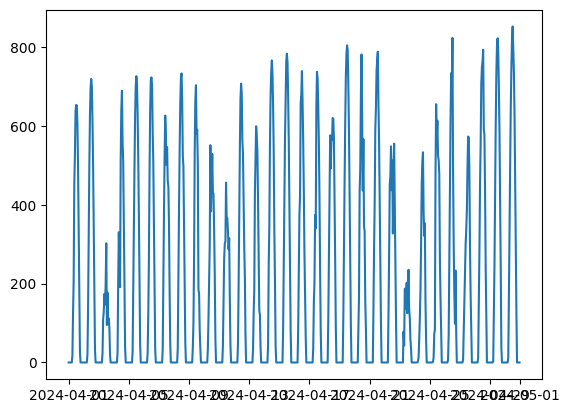

In [288]:
df_jan = df_tmy[df_tmy.index.month == 4]

# show the first 15 rows:
plt.plot(df_jan['GHI'])

In [289]:
# select data source!
# df = df_tmy
df = df_historical

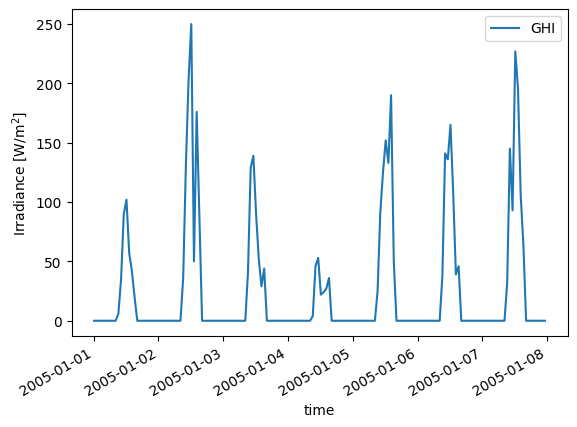

In [291]:
# Plotting the three irradiance fields

first_week = df.head(24*7) # Plotting 7 days, each one has 24 hours or entries
# first_week[['GHI', 'DHI', 'DNI']].plot()
first_week[['GHI']].plot()
plt.ylabel('Irradiance [W/m$^2$]');

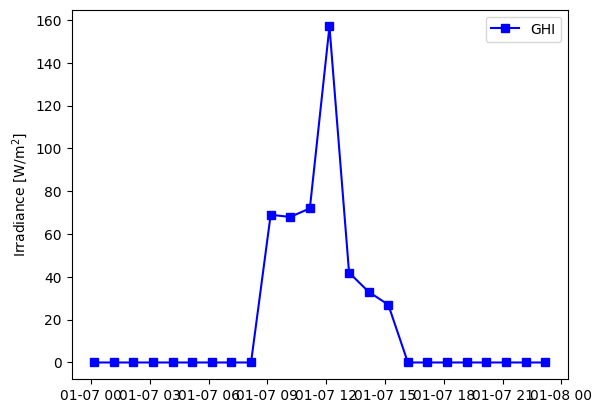

In [296]:
birthday = df.loc['2019-01-07':'2019-01-07']
# plt.plot(birthday['DNI'], color='r') 
# plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]');
# plt.legend(['DNI', 'DHI', 'GHI'])
plt.legend(['GHI'])

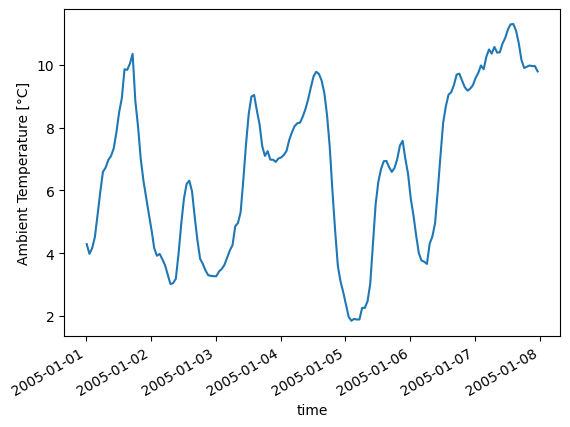

In [297]:
first_week['Temperature'].plot()
plt.ylabel('Ambient Temperature [°C]');

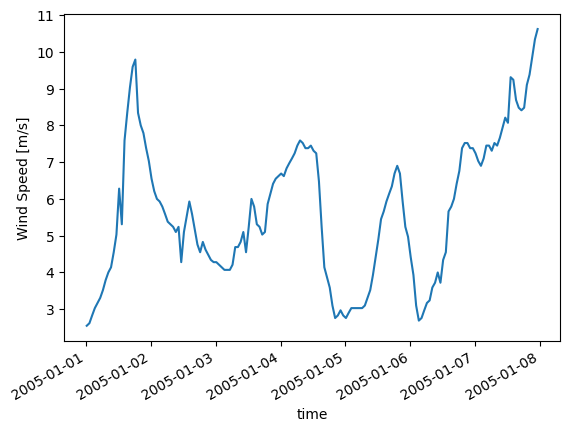

In [298]:
first_week['Wind Speed'].plot()
plt.ylabel('Wind Speed [m/s]');

In [299]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('M').sum()
monthly_ghi.head(12)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/2694762132.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ghi = df['GHI'].resample('M').sum()


time
2005-01-31     22348.24
2005-02-28     35021.61
2005-03-31     65186.40
2005-04-30    107253.98
2005-05-31    149084.28
2005-06-30    155902.39
2005-07-31    146281.29
2005-08-31    149504.80
2005-09-30    101302.66
2005-10-31     52979.78
2005-11-30     33613.33
2005-12-31     21172.12
Freq: ME, Name: GHI, dtype: float64

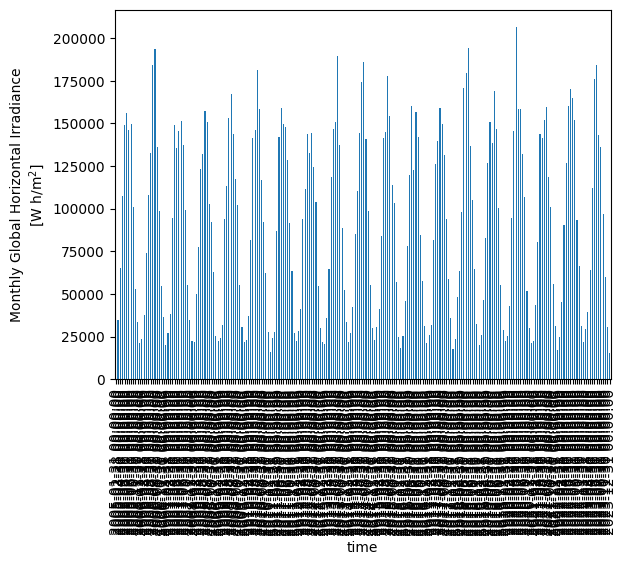

In [300]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/371858129.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()


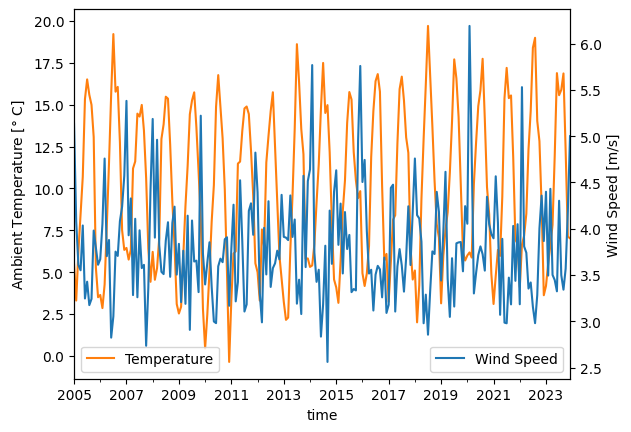

In [304]:
# Taking monthly averages instead of sums.

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()
monthly_average_temp_wind['Temperature'].plot(ax=ax1, c='tab:orange')
monthly_average_temp_wind['Wind Speed'].plot(ax=ax2, c='tab:blue')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right');

In [305]:
# Average DNI by DAY and by MONTH

try:
    daily_average_DNI = df[['DNI']].resample('D').mean()
    monthly_average_DNI = df[['DNI']].resample('M').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
    monthly_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

You haven't finished this exercise correctly, try again!


## Calculate Sun Position

- First we need to set our location to match the location from our EPW weather data.

- Then we calculate the position of the sun in the sky for each timepoint throughout the year at that location.

In [265]:
# make a Location object corresponding to this TMY
location = pvlib.location.Location(latitude=metadata['latitude'],
                                   longitude=metadata['longitude'])

# shift timestamps if necessary from the TMY file to match the solar position calculations
times = df.index - pd.Timedelta('49min')
solar_position = location.get_solarposition(times)
solar_position.index += pd.Timedelta('49min') # but remember to shift the index back to line up with the TMY data:

- Now we calculate the irradiance on the *titled solar array* which is the sum of the direct normal irradiance (DNI) and the diffuse horizontal irradiance (DHI) that strike the solar array. This is called the total plane-of-array irradiance (POA). The POA irradiance is the input to the PV power model.

- This calculation is doe using the `pvlib.irradiance.get_total_irradiance()` function.

- Here i am running the calculation at a variety of tilt angles (from 0 to 45deg) to see the sensitivity.

In [266]:
poas = {}  # Use a dictionary to store DataFrames for each tilt angle

for tilt in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]:
    # Calculate the total irradiance for the given tilt angle
    poa = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,  # Tilt angle
        surface_azimuth=180,  # Facing South
        dni=df['DNI'],
        ghi=df['GHI'],
        dhi=df['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )
    
    # Store the resulting DataFrame in the dictionary with the tilt as the key
    poas[tilt] = poa

# Access individual DataFrames by tilt angle, e.g., poas[10] for tilt=10

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/2055563732.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_tilts.resample('M').sum()


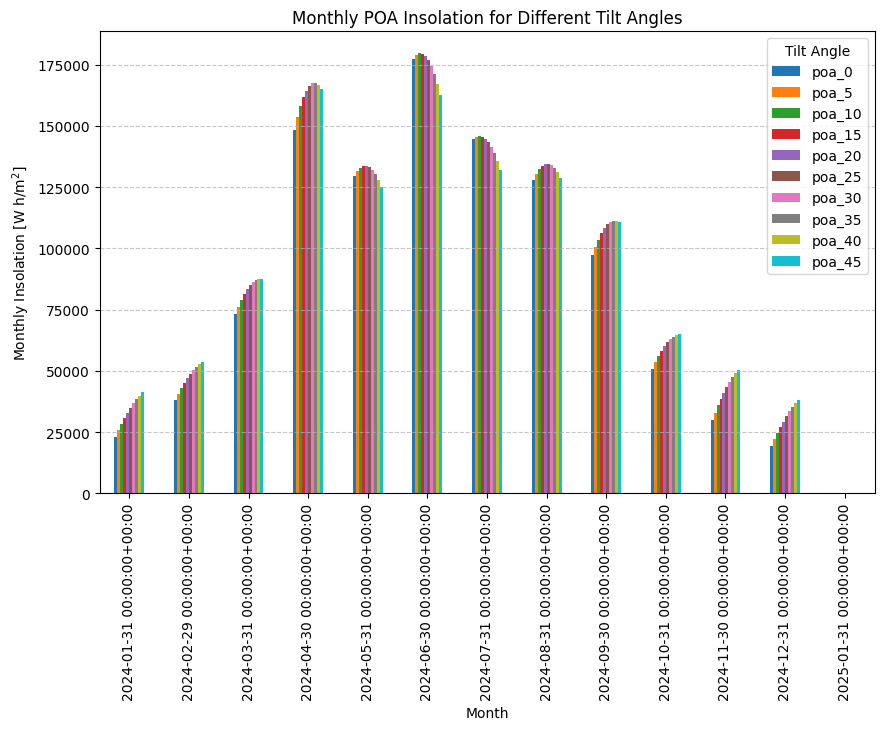

In [267]:
# Create a DataFrame with POA global values for all tilt angles in the dictionary
df_tilts = pd.DataFrame({f'poa_{tilt}': poas[tilt]['poa_global'] for tilt in poas})

# Resample the data to monthly sums
df_monthly = df_tilts.resample('M').sum()

# Plot the monthly insolation as a bar chart
df_monthly.plot.bar(figsize=(10, 6))
plt.ylabel('Monthly Insolation [W h/m$^2$]')
plt.title('Monthly POA Insolation for Different Tilt Angles')
plt.xlabel('Month')
plt.legend(title='Tilt Angle')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Model the Temperature of the Panels

We already have the weather data providing the air temperature. However we need to know the temperature
of the solar panels themselves, as this is a critical input to determine the power production.

The temperature of the solar panels depends on many factors, and we will use an established model to estimate the temperature at each timepoint based on these factors:

- air temperature
- wind speed
- solar irradiance (DNI)
- the type of solar panel
- the panel's mounting configuration


In [268]:
all_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())

['open_rack_glass_glass',
 'close_mount_glass_glass',
 'open_rack_glass_polymer',
 'insulated_back_glass_polymer']

In [269]:
tilt = 15  # choose a tilt angle from tilts used above
parameters = all_parameters['open_rack_glass_glass']
display(parameters)
# note the "splat" operator "**" which expands the dictionary "parameters"
# into a comma separated list of keyword arguments
cell_temperature = pvlib.temperature.sapm_cell(
    df_tilts[f'poa_{tilt}'], df['Temperature'], df['Wind Speed'], **parameters)

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

Text(0, 0.5, 'Temperature [°C]')

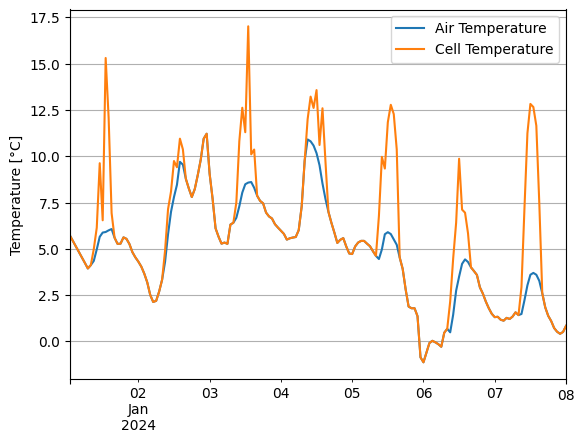

In [270]:
# Now we can plot the cell temperature against the ambient temperature

df['Temperature'].head(24*7).plot()
cell_temperature.head(24*7).plot()
plt.grid()
plt.legend(['Air Temperature', 'Cell Temperature'])
# # note Python 3 can use unicode characters like the degrees symbol
plt.ylabel('Temperature [°C]')

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/1896444585.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Temperature rise above ambient [$\degree C$]')


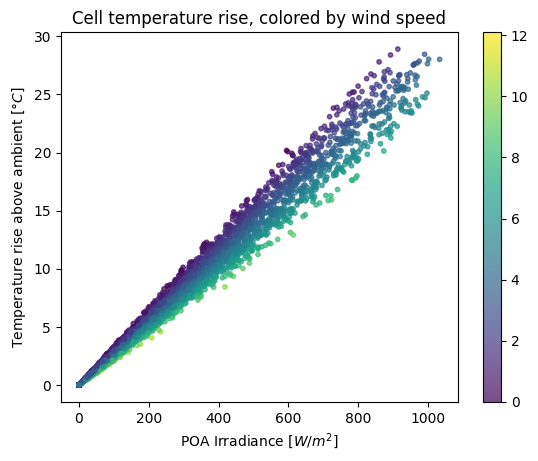

In [271]:
temperature_difference = cell_temperature - df['Temperature']
plt.scatter(poas[tilt]['poa_global'], temperature_difference, c=df['Wind Speed'], s=10, alpha=0.7)
plt.colorbar()
# note you can use LaTeX math in matplotlib labels
# compare \degree" with the unicode symbol above
plt.ylabel('Temperature rise above ambient [$\degree C$]')
plt.xlabel('POA Irradiance [$W/m^2$]');
plt.title('Cell temperature rise, colored by wind speed');

## Power Generation Calculation

We will start by creating a PVWatts model to calculate the power generation on a TMY.

In [272]:
# Assume a 1kW nameplate module with a 0.4% temperature coefficient
gamma_pdc = -0.4 / 100.0  # divide by 100 to go from %/°C to 1/°C
nameplate = 1e3

array_power = pvlib.pvsystem.pvwatts_dc(poas[tilt]['poa_global'], cell_temperature, nameplate, gamma_pdc)


Text(0, 0.5, 'Array Power [W]')

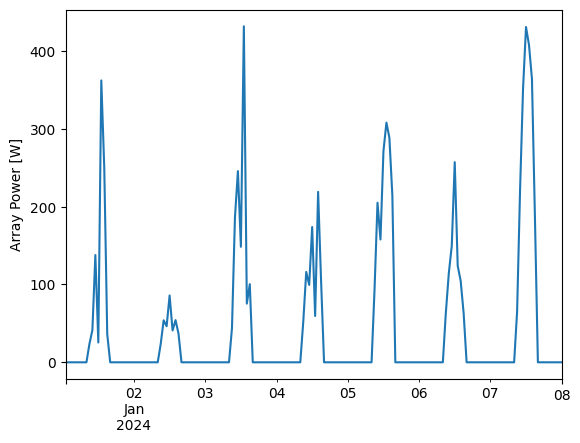

In [273]:
array_power.head(24*7).plot()
plt.ylabel('Array Power [W]')

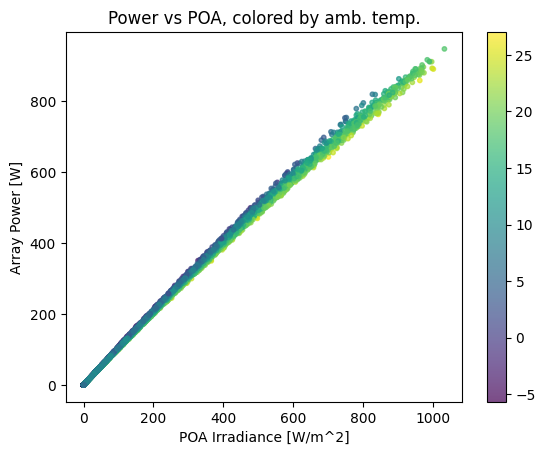

In [274]:
plt.scatter(poas[tilt]['poa_global'], array_power, c=df['Temperature'], s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by amb. temp.');

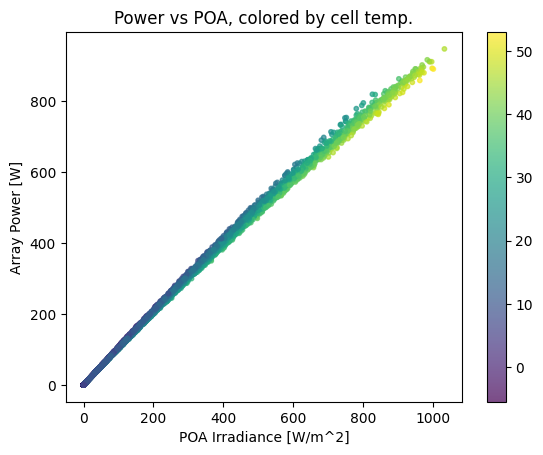

In [275]:
plt.scatter(poas[tilt]['poa_global'], array_power, c=cell_temperature, s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by cell temp.');

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_10129/123507405.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_plot.resample('M').sum().plot.bar()


Text(0, 0.5, 'Energy [Wh]')

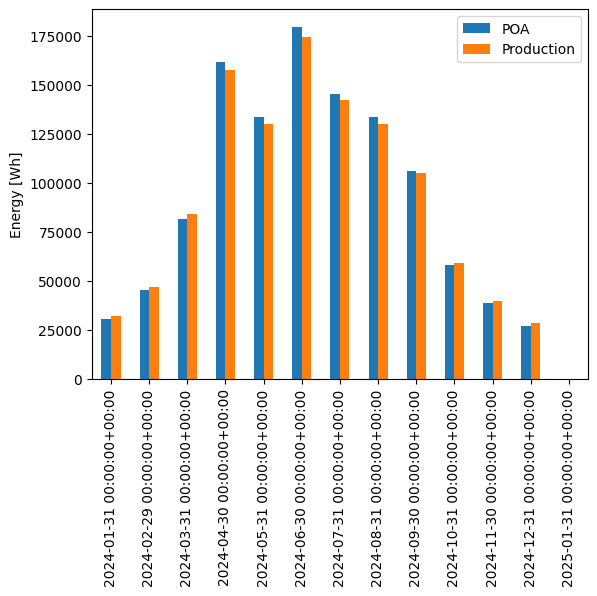

In [276]:
# Compare monthly energy production vs insolation

df_plot = pd.DataFrame({
    'POA': poas[tilt]['poa_global'],
    'Production': array_power,
})
# summing hourly power (W) gives (W h)
df_plot.resample('M').sum().plot.bar()
plt.ylabel('Energy [Wh]')

In [277]:
import json
# Open the JSON file and store it as a dictionary
with open('data/Monthlydata_51.483_-1.714_SA3_2005_2023.json', 'r') as file:
    json_data = json.load(file)
    display(json_data)

{'inputs': {'location': {'latitude': 51.483,
   'longitude': -1.714,
   'elevation': 166.0},
  'meteo_data': {'radiation_db': 'PVGIS-SARAH3',
   'meteo_db': 'ERA5',
   'year_min': 2005,
   'year_max': 2023,
   'use_horizon': True,
   'horizon_db': None,
   'horizon_data': 'DEM-calculated'},
  'plane': {'fixed_horizontal': {'slope': {'value': 0, 'optimal': '-'},
    'azimuth': {'value': '-', 'optimal': '-'}}}},
 'outputs': {'monthly': [{'year': 2005,
    'month': 1,
    'H(h)_m': 22.35,
    'T2m': 5.7},
   {'year': 2005, 'month': 2, 'H(h)_m': 35.0, 'T2m': 3.1},
   {'year': 2005, 'month': 3, 'H(h)_m': 65.18, 'T2m': 6.5},
   {'year': 2005, 'month': 4, 'H(h)_m': 107.24, 'T2m': 8.6},
   {'year': 2005, 'month': 5, 'H(h)_m': 149.06, 'T2m': 10.6},
   {'year': 2005, 'month': 6, 'H(h)_m': 155.9, 'T2m': 15.5},
   {'year': 2005, 'month': 7, 'H(h)_m': 146.17, 'T2m': 16.5},
   {'year': 2005, 'month': 8, 'H(h)_m': 149.43, 'T2m': 15.6},
   {'year': 2005, 'month': 9, 'H(h)_m': 101.28, 'T2m': 14.8},
   

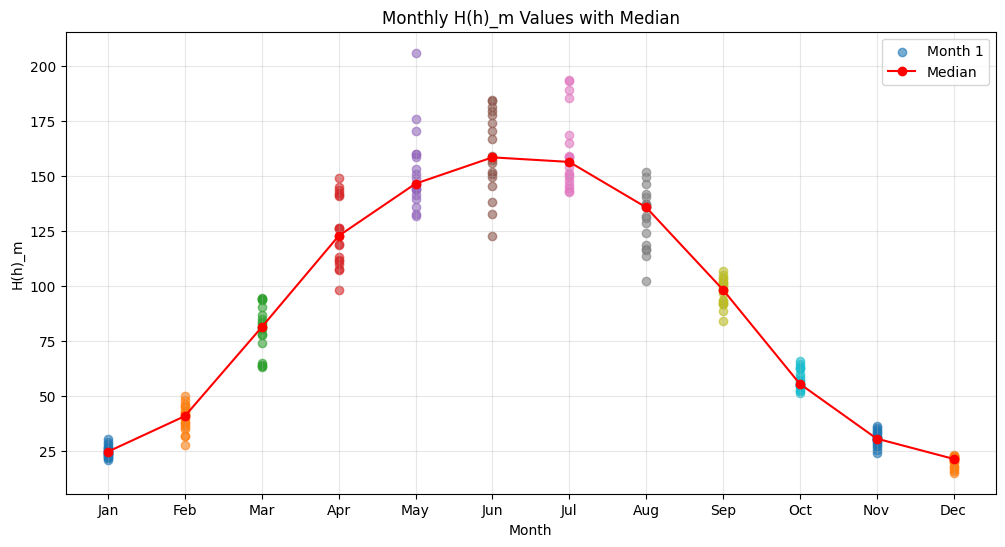

In [281]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'monthly' data from the JSON
monthly_data = json_data['outputs']['monthly']

# Convert the JSON data into a DataFrame
df = pd.DataFrame(monthly_data)

# Group the data by month
grouped = df.groupby('month')['H(h)_m']

# Plot the data points for each year
plt.figure(figsize=(12, 6))
for month, group in grouped:
    plt.scatter([month] * len(group), group, alpha=0.6, label=f'Month {month}' if month == 1 else "")

# Calculate the median for each month and plot it
median_values = grouped.median()
plt.plot(median_values.index, median_values.values, color='red', marker='o', label='Median')

# Customize the plot
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('H(h)_m')
plt.title('Monthly H(h)_m Values with Median')
plt.legend()
plt.grid(alpha=0.3)
plt.show()